In [4]:
#Importing the input
import numpy as np
import pandas as pd
df=pd.read_csv("Week3 Dataset.csv", skiprows=[0], names=["X1","X2","y"])
print(df.head())
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

     X1    X2     y
0 -0.41 -0.04 -0.11
1  0.34 -0.69  0.49
2 -0.59 -0.40 -0.13
3  0.49  0.63 -1.14
4  0.74  0.09 -1.04


In [5]:
#Knowing the input data
print(np.shape(df))
print(min(X1), max(X1))
print(min(X2), max(X2))
print(min(y), max(y))

(199, 3)
-0.99 0.99
-1.0 0.97
-3.08 1.44


Text(0.5, 0.92, 'Training data')

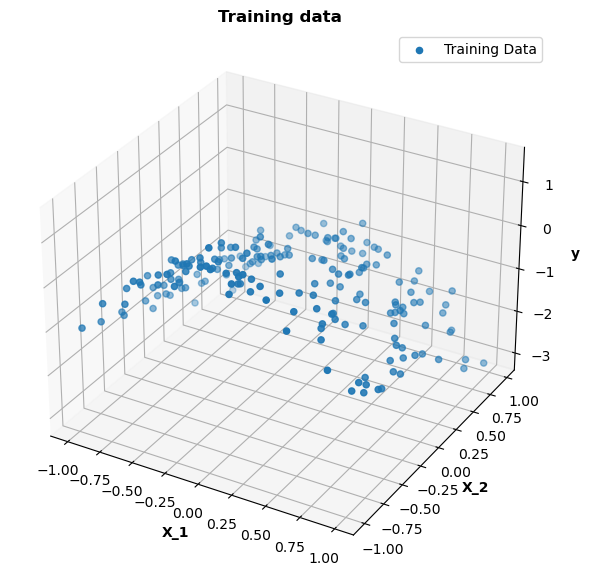

In [6]:
#Visualizing the input datsets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1,X2,y, label = "Training Data")
ax.set_xlabel("X_1", fontweight ='bold')
ax.set_ylabel("X_2", fontweight ='bold')
ax.set_zlabel("y", fontweight ='bold')
ax.legend()
ax.set_title("Training data", fontweight ='bold')

In [7]:
#Splitting the model into train, and test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [8]:
#Adding extra polynomial features equal to all combinations of powers of the two features up to power 5
from sklearn.preprocessing import PolynomialFeatures
Xtrain_poly = PolynomialFeatures(5).fit_transform(Xtrain)
Xtest_poly = PolynomialFeatures(5).fit_transform(Xtest)
X_poly = PolynomialFeatures(5).fit_transform(X)

In [9]:
#Grid of feature values, to use for predictions
import numpy as np
Xt=[]
grid=np.linspace(-2,2)
for i in grid:
  for j in grid:
    Xt.append([i,j])
Xt = np.array(Xt)
XTest = PolynomialFeatures(5).fit_transform(Xt)

C =  1
-0.6770469798657718 [ 0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.
 -0. -0. -0.]


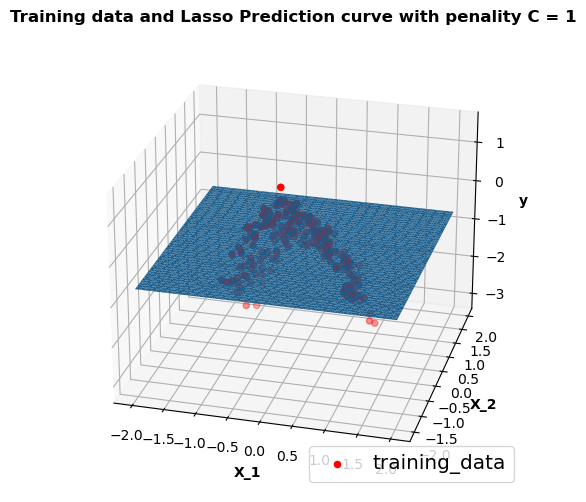

C =  10
-0.18696236907692493 [ 0.         -0.         -0.86447384 -1.46843925 -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.         -0.        ]


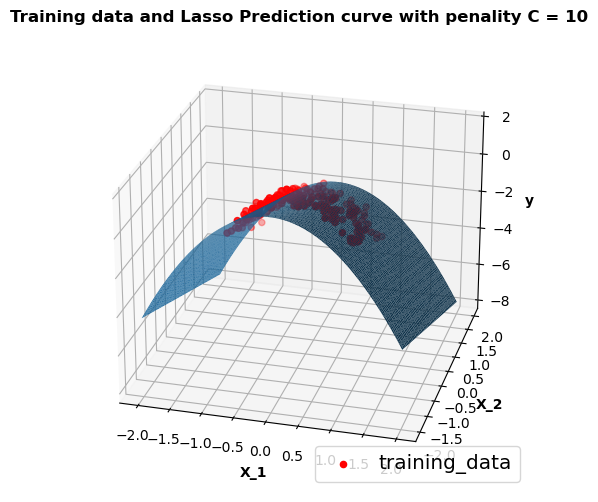

C =  100
-0.023334673938775974 [ 0.00000000e+00 -1.36646257e-03 -1.01098155e+00 -1.95575698e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.55655935e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00]


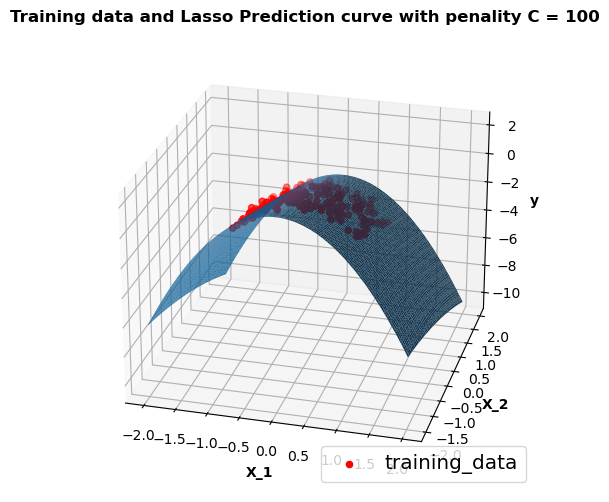

C =  1000
-0.04662071584616023 [ 0.         -0.11214401 -1.05185045 -1.87912503  0.22399519  0.09321192
  0.0677355   0.28349958  0.          0.         -0.0278265  -0.0934925
 -0.32930875 -0.21727768 -0.          0.10589652 -0.27513289 -0.18715258
 -0.0300424   0.2090885  -0.        ]


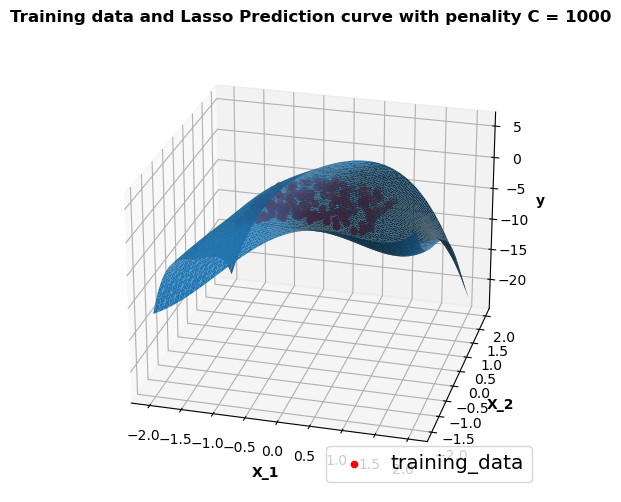

C =  10000
-0.06711777233223237 [ 0.         -0.20350645 -1.40967679 -1.86981679  0.49869967  0.28937102
  0.22976202  1.34971354  0.06430015  1.01970965  0.00290849 -0.40598751
 -0.48074133 -0.36396856 -0.20561772  0.09925099 -0.94022849 -0.59953102
 -0.87845646  0.45668875 -0.70819214]


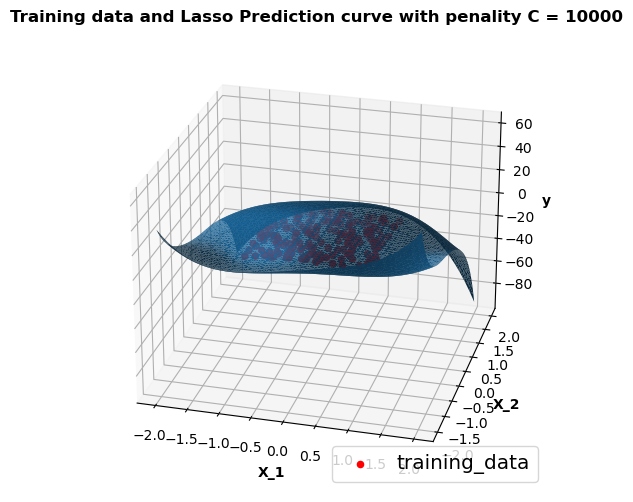

In [10]:
#Training Lasso regression models with the polynomial features
#Starting with c=1 as it penalized all parameters to zero 
c=[1,10,100,1000,10000]

for i in c:
  from sklearn.linear_model import Lasso
  Lasso_Model = Lasso(alpha = 1/(2*i)).fit(Xtrain_poly, ytrain)
  Lasso_pred = Lasso_Model.predict(XTest)

  print("C = ", i)
  print(Lasso_Model.intercept_, Lasso_Model.coef_)

  #Visualising our predictions against our training data
  figr = plt.figure(figsize =(8, 6))
  ax = figr.add_subplot(projection='3d')
  ax.scatter(X1,X2,y, c='r', label="training_data")
  ax.plot_trisurf(Xt[:,0], Xt[:,1], Lasso_pred)
  # ax.set_title("Prediction surface")
  ax.set_xlabel("X_1", fontweight ='bold')
  ax.set_ylabel("X_2", fontweight ='bold')
  ax.set_zlabel("y", fontweight ='bold')
  ax.legend(loc='lower right', fontsize = 'x-large')
  ax.set_title(f"Training data and Lasso Prediction curve with penality C = {i}",fontweight ='bold')
  ax.view_init(25, -75)
  plt.show()

C =  0.1
-0.23360479005877055 [ 0.         -0.07488093 -0.73900489 -0.94902529  0.03676799  0.10418185
  0.03715433 -0.0708816   0.00974165 -0.23173168 -0.69592137 -0.03474748
 -0.32325213 -0.06821259  0.01692191  0.04736723 -0.03510109  0.00345407
  0.01545799  0.05281727 -0.08612374]


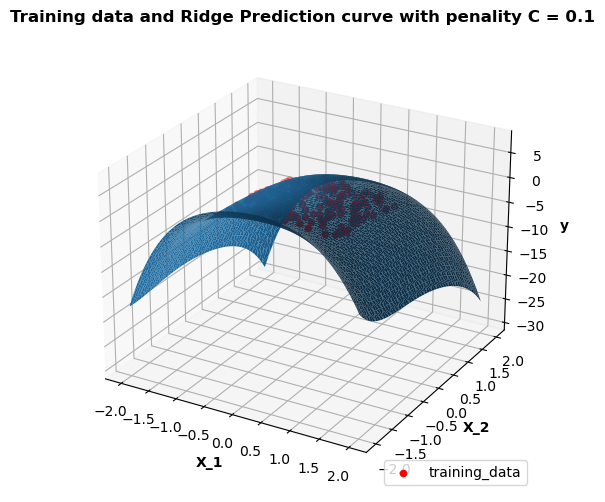

C =  1
-0.12542152814797358 [ 0.         -0.13117087 -0.98861337 -1.39548282  0.19970365  0.20106568
  0.10375724  0.12757964  0.06512078 -0.06390113 -0.49272508 -0.08145372
 -0.43961853 -0.20417471 -0.06369228  0.08824708 -0.15697983 -0.20225974
 -0.01479619  0.13487189  0.01020737]


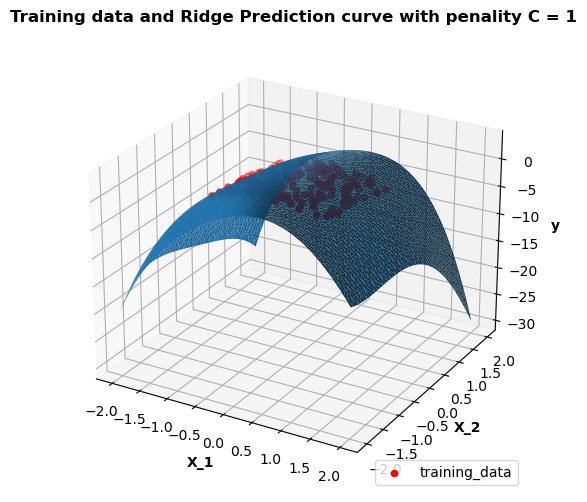

C =  10
-0.0825440699610912 [ 0.         -0.20870995 -1.23066488 -1.7623336   0.4209678   0.27788799
  0.23825808  0.86086292  0.16896621  0.49613608 -0.10922742 -0.30421684
 -0.47972537 -0.33068863 -0.16969199  0.08568818 -0.62250037 -0.59207864
 -0.52808336  0.31476541 -0.33210984]


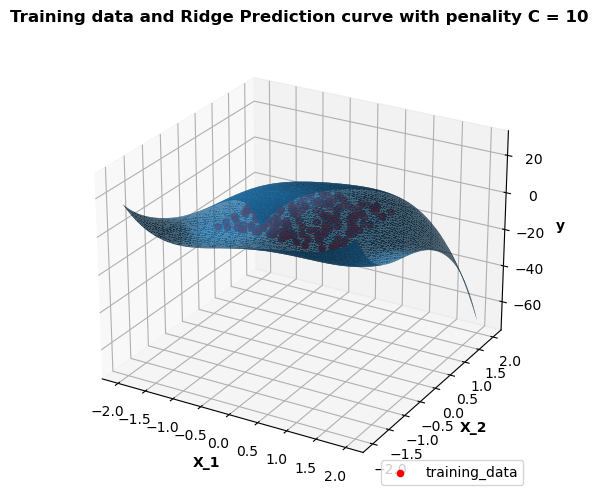

C =  100
-0.06994139562485335 [ 0.         -0.21930819 -1.42674751 -1.87091815  0.51630908  0.31396008
  0.26480085  1.38021577  0.10048726  1.08282528  0.01006178 -0.4289235
 -0.49570101 -0.36920053 -0.23205981  0.08359819 -0.95213198 -0.65460099
 -0.9127324   0.45738645 -0.75988435]


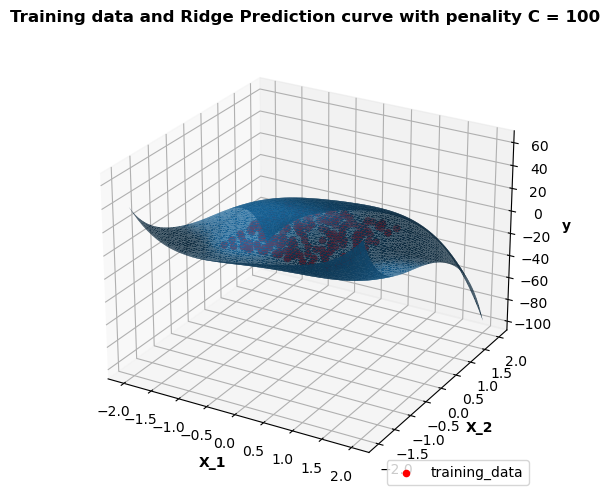

C =  1000
-0.06795066514655212 [ 0.         -0.21737711 -1.463858   -1.88698572  0.53073979  0.31981164
  0.26162315  1.47136147  0.07568186  1.19915136  0.02749918 -0.44950077
 -0.49723653 -0.37370607 -0.24326454  0.08658024 -1.00996769 -0.65259267
 -0.9806285   0.48815042 -0.8469935 ]


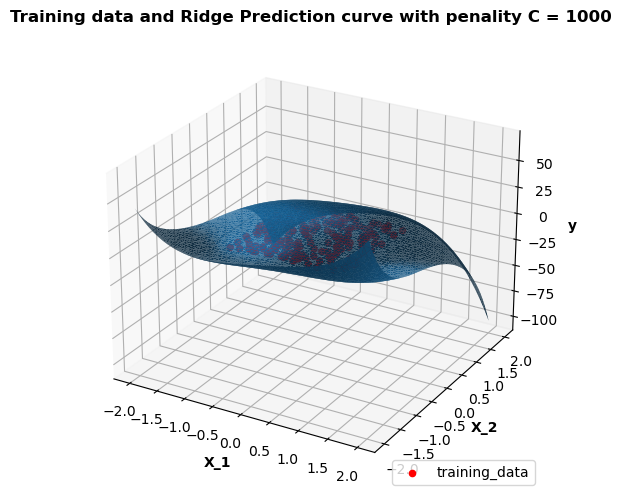

C =  10000
-0.06773627772259827 [ 0.         -0.21710088 -1.46791131 -1.88869543  0.53226747  0.3204351
  0.26112901  1.48121479  0.07277738  1.21192846  0.02934898 -0.4517088
 -0.49737779 -0.37415729 -0.24447978  0.08697941 -1.01621812 -0.65217173
 -0.98797531  0.49159268 -0.85659129]


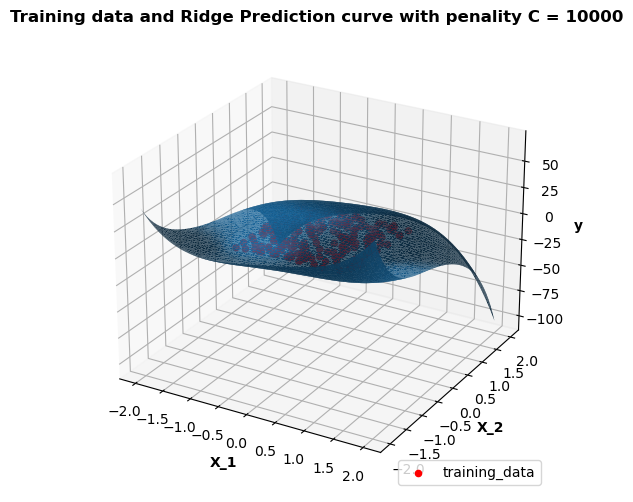

In [11]:
#Training Ridge regression models with the polynomial features
#using same c as Lasso to compare with Ridge, additionally checking for c=0.1
c=[0.1,1,10,100,1000,10000]

for i in c:
  from sklearn.linear_model import Ridge
  Ridge_Model = Ridge(alpha = 1/(2*i)).fit(Xtrain_poly, ytrain)
  Ridge_pred = Ridge_Model.predict(XTest)

  print("C = ", i)
  print(Ridge_Model.intercept_, Ridge_Model.coef_)

  #Visualising our predictions against our training data
  # plt.rc('font', size=8); plt.rcParams['figure.constrained_layout.use'] = True
  figr = plt.figure(figsize =(8, 6))
  ax = figr.add_subplot(projection='3d')
  ax.scatter(X1,X2,y, c='r', label="training_data")
  ax.plot_trisurf(Xt[:,0], Xt[:,1], Ridge_pred)
  # ax.set_title("Prediction surface")
  ax.set_xlabel("X_1", fontweight ='bold')
  ax.set_ylabel("X_2", fontweight ='bold')
  ax.set_zlabel("y", fontweight ='bold')
  ax.legend(loc='lower right', fontsize = 'medium')
  ax.set_title(f"Training data and Ridge Prediction curve with penality C = {i}",fontweight ='bold')
  ax.view_init(25, -60)
  plt.show()

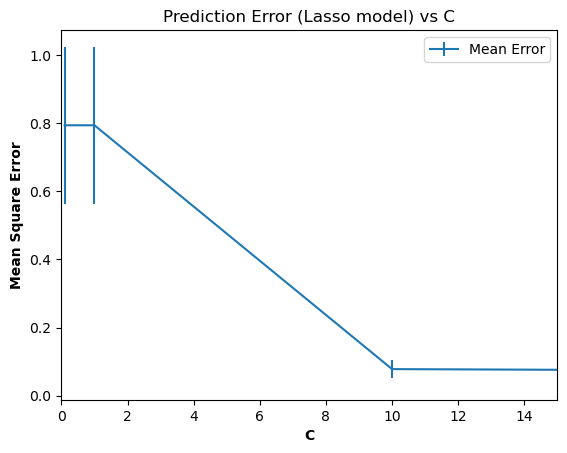

In [12]:
#Using K-Fold to cross validate, and find best C value for Lasso Regression
#best C means, optimum penalty with minimum MSE in the model
mean_error=[]; std_error=[]
c=[0.1,1,10,100,1000,10000]
for Ci in c:
  model = Lasso(alpha=1/(2*Ci))
  temp=[]
  from sklearn.model_selection import KFold
  kf = KFold(n_splits=5)
  for train, test in kf.split(X): ##
    XtrPoly = PolynomialFeatures(5).fit_transform(X[train])
    XtePoly = PolynomialFeatures(5).fit_transform(X[test])
    model.fit(XtrPoly, y[train]) ##
    ypred = model.predict(XtePoly) ##
    from sklearn.metrics import mean_squared_error
    temp.append(mean_squared_error(y[test],ypred)) ##
  mean_error.append(np.array(temp).mean())
  std_error.append(np.array(temp).std())
import matplotlib.pyplot as plt
# iter = np.array(c)
# cVal = range(len(iter))
plt.errorbar(c,mean_error,yerr=std_error, label = "Mean Error")
# plt.errorbar(c,std_error,yerr=mean_error, label = "Standard deviation Error")
plt.xlabel('C', fontweight ='bold'); plt.ylabel('Mean Square Error', fontweight ='bold')
plt.title("Prediction Error (Lasso model) vs C")
plt.xlim((0,15))
plt.legend()
plt.show()


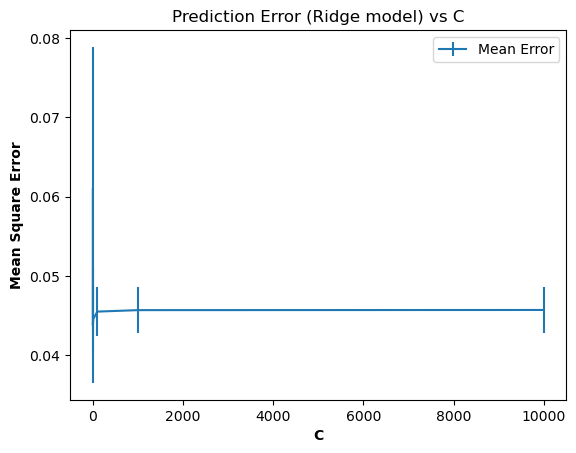

In [13]:
#Using K-Fold to cross validate, and find best C value for Ridge Regression
#best C means, optimum penalty with minimum MSE in the model
mean_error=[]; std_error=[]
c=[0.1,1,10,100,1000,10000]
for Ci in c:
  model = Ridge(alpha=1/(2*Ci))
  temp=[]
  from sklearn.model_selection import KFold
  kf = KFold(n_splits=5)
  for train, test in kf.split(X): ##
    XtrPoly = PolynomialFeatures(5).fit_transform(X[train])
    XtePoly = PolynomialFeatures(5).fit_transform(X[test])
    model.fit(XtrPoly, y[train]) ##
    ypred = model.predict(XtePoly) ##
    from sklearn.metrics import mean_squared_error
    temp.append(mean_squared_error(y[test],ypred)) ##
  mean_error.append(np.array(temp).mean())
  std_error.append(np.array(temp).std())
import matplotlib.pyplot as plt
# iter = np.array(c)
# cVal = range(len(iter))
plt.errorbar(c,mean_error,yerr=std_error, label = "Mean Error")
# plt.errorbar(c,std_error,yerr=mean_error, label = "Standard deviation Error")
plt.xlabel('C', fontweight ='bold'); plt.ylabel('Mean Square Error', fontweight ='bold')
plt.title("Prediction Error (Ridge model) vs C")
# plt.xlim((0,20))
plt.legend()
plt.show()

In [15]:
#comparing with baseline predictor
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean').fit(Xtrain_poly, ytrain)
ydummy = dummy.predict(Xtest_poly)
from sklearn.metrics import mean_squared_error
print('square error of baseline dummy model: %f'%(mean_squared_error(ytest,ydummy)))
print('square error of baseline dummy model: %f'%(mean_squared_error(ytest,ydummy)))


square error of baseline dummy model: 0.931706
square error of baseline dummy model: 0.931706
